In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# separate into closed_eyes, and open_eyes folders - CEW (Closed Eyes in Wild) dataset
import shutil

# source directory of CEW dataset
source_directory = 'D:/JATHURSH/SEMI-06/project/Closed Eyes In The Wild (CEW) dataset/dataset_B_Eye_Images'

# destination directory to move the images.
destination_directory = 'D:/JATHURSH/Jupyter_notebook_projects/CEW dataset'

# Create subdirectories for open and closed eyes within the destination directory
os.makedirs(os.path.join(destination_directory, 'open_eyes'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'closed_eyes'), exist_ok=True)

# Walk through the source directory and its subfolders
for root, dirs, files in os.walk(source_directory):
    for file in files:
        # Check if the file is an image (you can customize the file extensions as needed)
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Determine if it's an open or closed eye based on the subfolder name
            if 'open' in root.lower():
                destination = os.path.join(destination_directory, 'open_eyes', file)
            elif 'closed' in root.lower():
                destination = os.path.join(destination_directory, 'closed_eyes', file)
            else:
                continue  # Skip files that don't fit the naming convention

            # Move the file to the appropriate destination
            shutil.move(os.path.join(root, file), destination)

print("Images moved successfully")

Images moved successfully


In [3]:
# separate into closed_eyes, and open_eyes folders - ZJU Eyeblink dataset
# source directory of CEW dataset
source_directory = 'D:/JATHURSH/SEMI-06/project/Eyeblink_ZJU_dataset/Dataset_A_Eye_Images'

# destination directory to move the images.
destination_directory = 'D:/JATHURSH/Jupyter_notebook_projects/ZJU dataset'

# Create subdirectories for open and closed eyes within the destination directory
os.makedirs(os.path.join(destination_directory, 'open_eyes'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'closed_eyes'), exist_ok=True)

# Walk through the source directory and its subfolders
for root, dirs, files in os.walk(source_directory):
    for file in files:
        # Check if the file is an image (you can customize the file extensions as needed)
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Determine if it's an open or closed eye based on the subfolder name
            if 'open' in root.lower():
                destination = os.path.join(destination_directory, 'open_eyes', file)
            elif 'closed' in root.lower():
                destination = os.path.join(destination_directory, 'closed_eyes', file)
            else:
                continue  # Skip files that don't fit the naming convention

            # Move the file to the appropriate destination
            shutil.move(os.path.join(root, file), destination)

print("Images moved successfully")

Images moved successfully


In [4]:
test_img_array_CEW = cv2.imread("D:/JATHURSH/Jupyter_notebook_projects/CEW dataset/closed_eyes/closed_eye_0061.jpg_face_1_L.jpg",cv2.IMREAD_GRAYSCALE)
test_img_array_ZJU = cv2.imread("D:/JATHURSH/Jupyter_notebook_projects/ZJU dataset/open_eyes\h0036.jpg",cv2.IMREAD_GRAYSCALE)

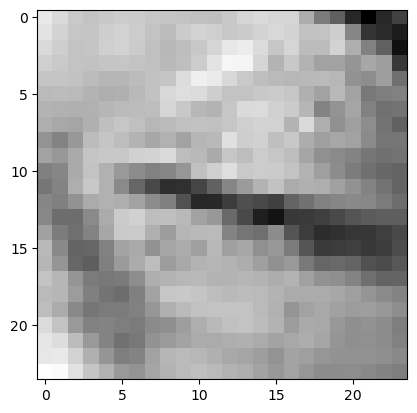

In [5]:
plt.imshow(test_img_array_CEW, cmap="gray")

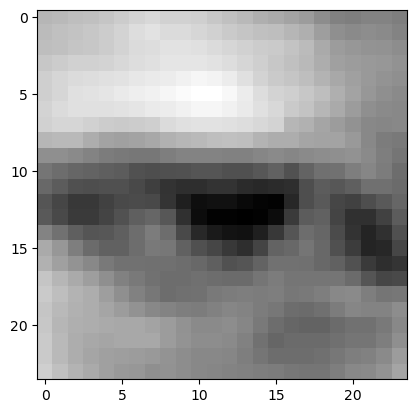

In [6]:
plt.imshow(test_img_array_ZJU, cmap="gray")

In [7]:
test_img_array_CEW.shape

(24, 24)

In [8]:
test_img_array_ZJU.shape

(24, 24)

In [15]:
data_dir_CEW = 'D:/JATHURSH/Jupyter_notebook_projects/CEW dataset'
data_dir_ZJU = 'D:/JATHURSH/Jupyter_notebook_projects/ZJU dataset'
sub_dir_classes = ["closed_eyes","open_eyes"]
img_size = 224 

# Define method - to read all images and convert them into array for data and labels
full_dataset_CEW = []
full_dataset_ZJU = []

# defining a method to create dataset array with img_array + label
def create_full_dataset(data_dir, full_dataset):
    for sub_dir in sub_dir_classes:
        path = os.path.join(data_dir, sub_dir)
        label = sub_dir_classes.index(sub_dir) # 0 - closed or 1 - open
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_img_array = cv2.resize(back_to_rgb, (img_size, img_size))
                full_dataset.append([new_img_array, label])
            except Exception as e:
                pass

In [16]:
# create img + label array for both CEW and ZJU
create_full_dataset(data_dir_CEW, full_dataset_CEW)
create_full_dataset(data_dir_ZJU, full_dataset_ZJU)

In [17]:
len(full_dataset_CEW), len(full_dataset_ZJU)

(4846, 8984)

In [20]:
import random

# Shuffle both CEW and ZJU datasets
random.shuffle(full_dataset_CEW)
random.shuffle(full_dataset_ZJU)

# Select 2000 open eyes images randomly from the ZJU open eyes dataset - to balance between open and close eyes
num_open_eyes_to_select = 2000
selected_open_eyes = random.sample([item for item in full_dataset_ZJU if item[1] == 1], num_open_eyes_to_select)

# Create feature and label arrays (X and y) for CEW
X_CEW = np.array([item[0] for item in full_dataset_CEW])
y_CEW = np.array([item[1] for item in full_dataset_CEW])

# Create feature and label arrays (X and y) for ZJU
# Append the randomly selected open eyes images to the ZJU dataset
X_ZJU_closed = np.array([item[0] for item in full_dataset_ZJU if item[1] == 0])
y_ZJU_closed = np.array([item[1] for item in full_dataset_ZJU if item[1] == 0])

# Convert the images in selected_open_eyes to NumPy arrays
X_ZJU_open = np.array([item[0] for item in selected_open_eyes])
y_ZJU_open = np.array([1] * num_open_eyes_to_select)

# Concatenate the closed and open eye arrays
X_ZJU = np.concatenate((X_ZJU_closed, X_ZJU_open))
y_ZJU = np.concatenate((y_ZJU_closed, y_ZJU_open))

# Shuffle ZJU to mix open and close eyes
shuffle_indices = np.arange(len(X_ZJU))
np.random.shuffle(shuffle_indices)
X_ZJU = X_ZJU[shuffle_indices]
y_ZJU = y_ZJU[shuffle_indices]

# Verify the shapes of X and y for CEW and ZJU
print("CEW - X shape:", X_CEW.shape)
print("CEW - y shape:", y_CEW.shape)
print("ZJU - X shape:", X_ZJU.shape)
print("ZJU - y shape:", y_ZJU.shape)

CEW - X shape: (4846, 224, 224, 3)
CEW - y shape: (4846,)
ZJU - X shape: (3984, 224, 224, 3)
ZJU - y shape: (3984,)


In [29]:
# delete unwanted arrays to free up mem
del full_dataset_CEW
del full_dataset_ZJU

1

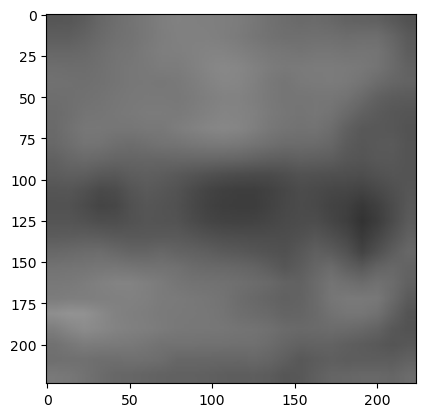

In [33]:
plt.imshow(X_ZJU[200], cmap="gray")
y_ZJU[200]

In [34]:
# train, test, validation splitting for CEW
from sklearn.model_selection import train_test_split

# Split the data into a training set and a temporary set (70% training, 30% temporary)
X_train_CEW, X_temp_CEW, y_train_CEW, y_temp_CEW = train_test_split(X_CEW, y_CEW, test_size=0.3, random_state=0)

In [35]:
# Split the temporary set into a validation set and a test set (50% validation, 50% test)
X_val_CEW, X_test_CEW, y_val_CEW, y_test_CEW = train_test_split(X_temp_CEW, y_temp_CEW, test_size=0.5, random_state=0)

In [36]:
print(X_train_CEW.shape, y_train_CEW.shape, X_val_CEW.shape, X_test_CEW.shape, y_val_CEW.shape, y_test_CEW.shape)

(3392, 224, 224, 3) (3392,) (727, 224, 224, 3) (727, 224, 224, 3) (727,) (727,)


In [37]:
# train, test, validation splitting for ZJU

# Split the data into a training set and a temporary set (70% training, 30% temporary)
X_train_ZJU, X_temp_ZJU, y_train_ZJU, y_temp_ZJU = train_test_split(X_ZJU, y_ZJU, test_size=0.3, random_state=0)

In [38]:
# Split the temporary set into a validation set and a test set (50% validation, 50% test)
X_val_ZJU, X_test_ZJU, y_val_ZJU, y_test_ZJU = train_test_split(X_temp_ZJU, y_temp_ZJU, test_size=0.5, random_state=0)

In [39]:
print(X_train_ZJU.shape, y_train_ZJU.shape, X_val_ZJU.shape, X_test_ZJU.shape, y_val_ZJU.shape, y_test_ZJU.shape)

(2788, 224, 224, 3) (2788,) (598, 224, 224, 3) (598, 224, 224, 3) (598,) (598,)


In [41]:
# free up mem
del X_temp_CEW
del y_temp_CEW
del X_temp_ZJU
del y_temp_ZJU

In [42]:
# Normalizing using mobilNetV2 - preprocess_input method (it normalizes from 0 - 255 to -1 - 1 and returns in float32)
# CEW
X_train_CEW_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train_CEW)
X_val_CEW_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val_CEW)
X_test_CEW_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_test_CEW)

In [43]:
# ZJU
X_train_ZJU_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train_ZJU)
X_val_ZJU_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val_ZJU)
X_test_ZJU_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_test_ZJU)

In [50]:
X_train_CEW_preprocessed.min(), X_train_CEW_preprocessed.max(), X_train_ZJU_preprocessed.min(), X_train_ZJU_preprocessed.max()

(-1.0, 1.0, -1.0, 1.0)

In [51]:
# save train, test, val split data
# Save the numpy array to the specified directory
save_dir_CEW = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/train_test_val_splits_preprocessed/CEW/'
save_dir_ZJU = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/train_test_val_splits_preprocessed/ZJU/'

np.save(save_dir_CEW + 'X_train_CEW_preprocessed.npy', X_train_CEW_preprocessed)
np.save(save_dir_CEW + 'X_val_CEW_preprocessed.npy', X_val_CEW_preprocessed)
np.save(save_dir_CEW + 'X_test_CEW_preprocessed.npy', X_test_CEW_preprocessed)
np.save(save_dir_CEW + 'y_train_CEW.npy', y_train_CEW)
np.save(save_dir_CEW + 'y_val_CEW.npy' ,y_val_CEW)
np.save(save_dir_CEW + 'y_test_CEW.npy' ,y_test_CEW)

np.save(save_dir_ZJU + 'X_train_ZJU_preprocessed.npy' ,X_train_ZJU_preprocessed)
np.save(save_dir_ZJU + 'X_val_ZJU_preprocessed.npy' ,X_val_ZJU_preprocessed)
np.save(save_dir_ZJU + 'X_test_ZJU_preprocessed.npy' ,X_test_ZJU_preprocessed)
np.save(save_dir_ZJU + 'y_train_ZJU.npy', y_train_ZJU)
np.save(save_dir_ZJU + 'y_val_ZJU.npy' ,y_val_ZJU)
np.save(save_dir_ZJU + 'y_test_ZJU.npy' ,y_test_ZJU)

In [52]:
# free up mem
del X_CEW
del y_CEW
del X_ZJU
del y_ZJU

In [54]:
# load MRL eye train, test, val splits
saved_dir_MRL = 'D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/'
X_train_MRL_preprocessed = np.load(saved_dir_MRL + 'X_train_preprocessed.npy')

X_test_MRL_preprocessed = np.load(saved_dir_MRL + 'X_test_preprocessed.npy')

X_val_MRL_preprocessed = np.load(saved_dir_MRL + 'X_val_preprocessed.npy')

y_train_MRL = np.load(saved_dir_MRL + 'y_train.npy')

y_test_MRL = np.load(saved_dir_MRL + 'y_test.npy')

y_val_MRL = np.load(saved_dir_MRL + 'y_val.npy')

In [59]:
# Combine 3 dataset splits together to from combined data and labels
X_train = np.concatenate((X_train_CEW_preprocessed, X_train_ZJU_preprocessed, X_train_MRL_preprocessed), axis=0)

In [60]:
# free up mem
del X_train_CEW_preprocessed
del X_train_ZJU_preprocessed
del X_train_MRL_preprocessed

In [61]:
X_val = np.concatenate((X_val_CEW_preprocessed, X_val_ZJU_preprocessed, X_val_MRL_preprocessed), axis=0)
X_test = np.concatenate((X_test_CEW_preprocessed, X_test_ZJU_preprocessed, X_test_MRL_preprocessed), axis=0)

In [62]:
# free up mem
del X_val_CEW_preprocessed
del X_val_ZJU_preprocessed
del X_val_MRL_preprocessed
del X_test_CEW_preprocessed
del X_test_ZJU_preprocessed
del X_test_MRL_preprocessed

In [63]:
y_train = np.concatenate((y_train_CEW, y_train_ZJU, y_train_MRL), axis=0)
y_val = np.concatenate((y_val_CEW, y_val_ZJU, y_val_MRL), axis=0)
y_test = np.concatenate((y_test_CEW, y_test_ZJU, y_test_MRL), axis=0)

In [64]:
# free up mem
del y_train_CEW
del y_train_ZJU
del y_train_MRL
del y_val_CEW
del y_val_ZJU
del y_val_MRL
del y_test_CEW
del y_test_ZJU
del y_test_MRL

In [66]:
# Shuffle the combined dataset
shuffle_indices = np.arange(len(X_train))
np.random.shuffle(shuffle_indices)

In [67]:
X_train = X_train[shuffle_indices]

In [68]:
y_train = y_train[shuffle_indices]

shuffle_indices = np.arange(len(X_val))
np.random.shuffle(shuffle_indices)

X_val = X_val[shuffle_indices]
y_val = y_val[shuffle_indices]

shuffle_indices = np.arange(len(X_test))
np.random.shuffle(shuffle_indices)

X_test = X_test[shuffle_indices]
y_test = y_test[shuffle_indices]

In [69]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35894, 224, 224, 3)
X_val shape: (7692, 224, 224, 3)
X_test shape: (7693, 224, 224, 3)
y_train shape: (35894,)
y_val shape: (7692,)
y_test shape: (7693,)


In [70]:
# save this combined train, test, validation split
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DrowsinessDetectionOnCombinedDataset/saved_data/train_test_val_splits_preprocessed_combined_dataset/'

np.save(save_dir + 'X_train.npy', X_train)
np.save(save_dir + 'X_val.npy', X_val)
np.save(save_dir + 'X_test.npy', X_test)
np.save(save_dir + 'y_train.npy', y_train)
np.save(save_dir + 'y_val.npy' ,y_val)
np.save(save_dir + 'y_test.npy' ,y_test)